# Face Mask Detection using Convolutional Neural Network  - Deep Learning

In [ ]:
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [4]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset


 96% 156M/163M [00:05<00:00, 31.5MB/s]
100% 163M/163M [00:05<00:00, 32.4MB/s]


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependencies

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:10])
print(with_mask_files[-10:])



['with_mask_2011.jpg', 'with_mask_3096.jpg', 'with_mask_1680.jpg', 'with_mask_287.jpg', 'with_mask_1861.jpg', 'with_mask_1733.jpg', 'with_mask_2051.jpg', 'with_mask_3305.jpg', 'with_mask_2599.jpg', 'with_mask_1239.jpg']
['with_mask_436.jpg', 'with_mask_1721.jpg', 'with_mask_585.jpg', 'with_mask_906.jpg', 'with_mask_1652.jpg', 'with_mask_3082.jpg', 'with_mask_315.jpg', 'with_mask_2292.jpg', 'with_mask_488.jpg', 'with_mask_2820.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:10])
print(without_mask_files[-10:])


['without_mask_849.jpg', 'without_mask_3530.jpg', 'without_mask_3353.jpg', 'without_mask_2951.jpg', 'without_mask_3760.jpg', 'without_mask_2122.jpg', 'without_mask_325.jpg', 'without_mask_3300.jpg', 'without_mask_2987.jpg', 'without_mask_3476.jpg']
['without_mask_1405.jpg', 'without_mask_2543.jpg', 'without_mask_842.jpg', 'without_mask_3665.jpg', 'without_mask_1462.jpg', 'without_mask_3136.jpg', 'without_mask_614.jpg', 'without_mask_1386.jpg', 'without_mask_1170.jpg', 'without_mask_1277.jpg']


In [10]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))


Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images

with mask --> 1

without mask --> 0

In [11]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [12]:
print(with_mask_labels[0:10])

print(without_mask_labels[0:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [14]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:10])
print(labels[-10:])

7553
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Displaying the Images

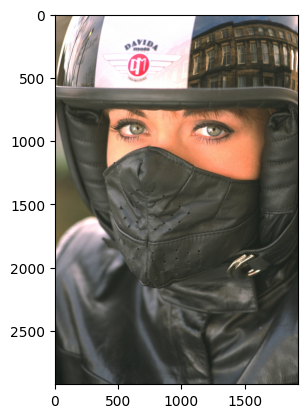

In [15]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_3184.jpg')
imgplot = plt.imshow(img)
plt.show()

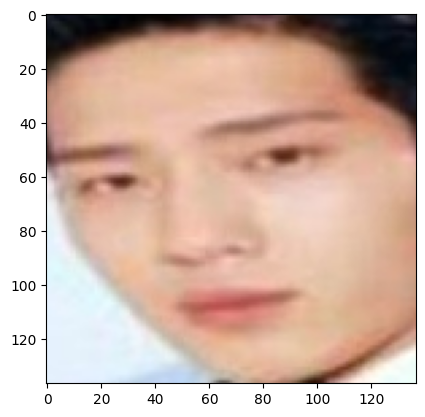

In [16]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1336.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1.Resize the Images

2.Convert the images to numpy arrays

In [26]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [27]:
type(data)

list

In [28]:
len(data)

7553

In [29]:
data[0]

array([[[136,  95, 107],
        [152, 111, 116],
        [169, 131, 121],
        ...,
        [136, 116, 134],
        [136, 110, 133],
        [134, 104, 131]],

       [[137,  97, 107],
        [158, 118, 121],
        [171, 131, 122],
        ...,
        [116, 117, 125],
        [128, 123, 134],
        [136, 128, 140]],

       [[133,  92, 100],
        [171, 130, 132],
        [181, 140, 131],
        ...,
        [126, 128, 136],
        [117, 117, 129],
        [137, 134, 151]],

       ...,

       [[ 47,  34,  44],
        [ 38,  26,  35],
        [ 33,  20,  29],
        ...,
        [125,  91,  69],
        [111,  79,  49],
        [ 87,  64,  44]],

       [[ 25,  17,  26],
        [ 34,  24,  33],
        [ 34,  21,  30],
        ...,
        [116,  91,  61],
        [115,  79,  47],
        [ 87,  59,  39]],

       [[ 21,  18,  28],
        [ 30,  24,  32],
        [ 31,  22,  30],
        ...,
        [ 86,  74,  36],
        [ 91,  65,  29],
        [ 94,  81,  57]]

In [30]:
type(data[0])

numpy.ndarray

In [31]:
data[0].shape

(128, 128, 3)

In [32]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)
type(X)
type(Y)

numpy.ndarray

In [33]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [34]:
print(X)

[[[[136  95 107]
   [152 111 116]
   [169 131 121]
   ...
   [136 116 134]
   [136 110 133]
   [134 104 131]]

  [[137  97 107]
   [158 118 121]
   [171 131 122]
   ...
   [116 117 125]
   [128 123 134]
   [136 128 140]]

  [[133  92 100]
   [171 130 132]
   [181 140 131]
   ...
   [126 128 136]
   [117 117 129]
   [137 134 151]]

  ...

  [[ 47  34  44]
   [ 38  26  35]
   [ 33  20  29]
   ...
   [125  91  69]
   [111  79  49]
   [ 87  64  44]]

  [[ 25  17  26]
   [ 34  24  33]
   [ 34  21  30]
   ...
   [116  91  61]
   [115  79  47]
   [ 87  59  39]]

  [[ 21  18  28]
   [ 30  24  32]
   [ 31  22  30]
   ...
   [ 86  74  36]
   [ 91  65  29]
   [ 94  81  57]]]


 [[[108  81  51]
   [111  84  54]
   [112  85  55]
   ...
   [140 108  65]
   [142 107  63]
   [148 108  62]]

  [[ 99  73  40]
   [102  75  42]
   [103  76  43]
   ...
   [136 104  61]
   [141 106  59]
   [153 115  61]]

  [[101  72  38]
   [104  75  41]
   [105  76  42]
   ...
   [148 115  72]
   [148 114  65]
   [153 117

In [35]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [37]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

X_train[0]

array([[[ 81,  80,  75],
        [ 83,  81,  76],
        [ 85,  81,  78],
        ...,
        [ 57,  60,  73],
        [ 62,  65,  80],
        [ 81,  86, 100]],

       [[ 82,  79,  74],
        [ 82,  79,  75],
        [ 80,  76,  73],
        ...,
        [ 64,  68,  79],
        [ 53,  56,  69],
        [ 83,  87, 101]],

       [[ 79,  75,  72],
        [ 78,  74,  71],
        [ 76,  72,  69],
        ...,
        [ 69,  73,  84],
        [ 57,  61,  72],
        [ 81,  85,  98]],

       ...,

       [[ 59,  30,  26],
        [ 63,  33,  29],
        [ 62,  32,  29],
        ...,
        [105,  73,  63],
        [ 82,  54,  45],
        [ 69,  42,  36]],

       [[ 63,  36,  32],
        [ 61,  34,  31],
        [ 58,  31,  28],
        ...,
        [ 98,  66,  56],
        [ 80,  51,  44],
        [ 66,  38,  33]],

       [[ 60,  35,  32],
        [ 56,  30,  28],
        [ 53,  28,  27],
        ...,
        [ 90,  58,  49],
        [ 76,  47,  42],
        [ 63,  34,  31]]

In [38]:
X_train_scaled[0]

array([[[0.31764706, 0.31372549, 0.29411765],
        [0.3254902 , 0.31764706, 0.29803922],
        [0.33333333, 0.31764706, 0.30588235],
        ...,
        [0.22352941, 0.23529412, 0.28627451],
        [0.24313725, 0.25490196, 0.31372549],
        [0.31764706, 0.3372549 , 0.39215686]],

       [[0.32156863, 0.30980392, 0.29019608],
        [0.32156863, 0.30980392, 0.29411765],
        [0.31372549, 0.29803922, 0.28627451],
        ...,
        [0.25098039, 0.26666667, 0.30980392],
        [0.20784314, 0.21960784, 0.27058824],
        [0.3254902 , 0.34117647, 0.39607843]],

       [[0.30980392, 0.29411765, 0.28235294],
        [0.30588235, 0.29019608, 0.27843137],
        [0.29803922, 0.28235294, 0.27058824],
        ...,
        [0.27058824, 0.28627451, 0.32941176],
        [0.22352941, 0.23921569, 0.28235294],
        [0.31764706, 0.33333333, 0.38431373]],

       ...,

       [[0.23137255, 0.11764706, 0.10196078],
        [0.24705882, 0.12941176, 0.11372549],
        [0.24313725, 0

Building a Convolutional Neural Networks (CNN)

In [39]:
import tensorflow as tf
from tensorflow import keras

In [40]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [41]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [42]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 15s 24ms/step - loss: 0.4880 - acc: 0.7695 - val_loss: 0.3360 - val_acc: 0.8579
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2899 - acc: 0.8865 - val_loss: 0.2720 - val_acc: 0.8793
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2316 - acc: 0.9093 - val_loss: 0.2266 - val_acc: 0.9190
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1885 - acc: 0.9233 - val_loss: 0.2231 - val_acc: 0.9058
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1632 - acc: 0.9356 - val_loss: 0.2488 - val_acc: 0.9140


Model Evaluation

In [43]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.2544 - acc: 0.9100
Test Accuracy = 0.9099934101104736


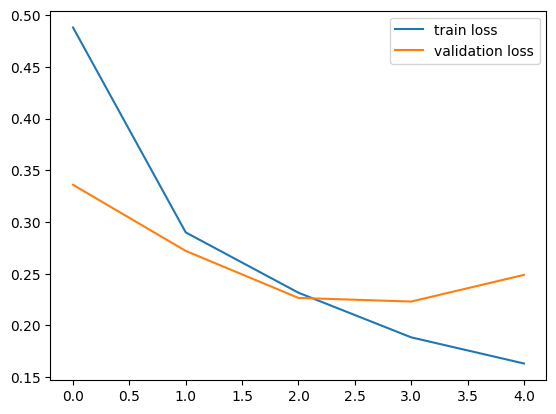

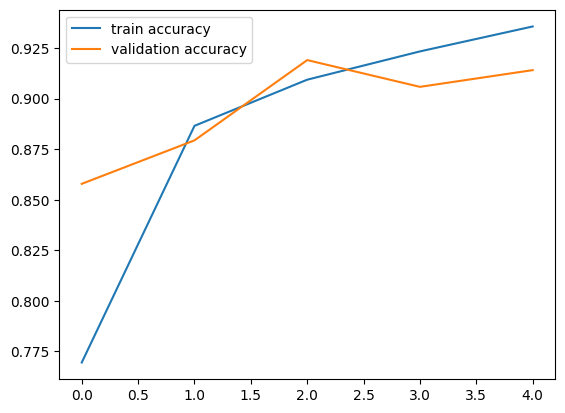

In [44]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/with mask1.jpg


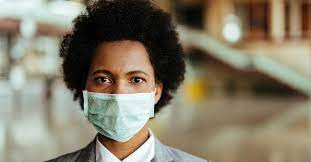

1/1 [==============================] - 0s 18ms/step
[[0.07618506 0.9617023 ]]
1
The person in the image is wearing a mask


In [59]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')